##  IMPORT THE LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Change the directory to AI Projects folder
%cd /content/drive/My Drive/Colab Notebooks/AI Projects/Datasets

/content/drive/My Drive/Colab Notebooks/AI Projects/Datasets


In [ ]:
sales_ds= pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI Projects/Datasets/sales_data_sample.csv', encoding='unicode_escape')

In [ ]:
sales_ds

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [ ]:
sales_ds.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


In [ ]:
#Converted order date into date time format using Pandas
sales_ds['ORDERDATE']= pd.to_datetime(sales_ds['ORDERDATE'])

In [ ]:
#Cheched the data types
sales_ds.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,datetime64[ns]
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


In [ ]:
#Total exist element in "ADDRESSLINE2"
sales_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [ ]:
sales_ds.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


\

In [ ]:

# Since there are so many Null values in 'ADDRESSLINE2','STATE', 'TERRITORY','POSTALCODE'
# Country will be representing the order grographical information.
# So we can drop 'CITY','ADDRESSLINE1','ADDRESSLINE2','POSTALCODE','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','ORDERNUMBER','CUSTOMERNAME'
# axis=1 indicates drop all the columns in the 'ds_drop'

ds_drop= ['CITY','ADDRESSLINE1','ADDRESSLINE2','POSTALCODE','TERRITORY','PHONE', 'STATE','CONTACTLASTNAME','CONTACTFIRSTNAME','ORDERNUMBER','CUSTOMERNAME']
sales_ds=sales_ds.drop(ds_drop, axis=1)
sales_ds.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [ ]:
sales_ds.isnull().sum()

,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0
PRODUCTLINE,0


In [ ]:
# Total of unique values exist 'country'
sales_ds['COUNTRY'].value_counts()

,count
COUNTRY,
USA,1004
Spain,342
France,314
Australia,185
UK,144
Italy,113
Finland,92
Norway,85
Singapore,79


In [ ]:
sales_ds.nunique()

,0
QUANTITYORDERED,58
PRICEEACH,1016
ORDERLINENUMBER,18
SALES,2763
ORDERDATE,252
STATUS,6
QTR_ID,4
MONTH_ID,12
YEAR_ID,3
PRODUCTLINE,7


In [ ]:
sales_ds['COUNTRY'].value_counts()

,count
COUNTRY,
USA,1004
Spain,342
France,314
Australia,185
UK,144
Italy,113
Finland,92
Norway,85
Singapore,79


## PERFORM EXPLORATORY DATA ANALYSIS AND DATA CLEANING

In [ ]:
sales_ds['COUNTRY'].value_counts().index

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object', name='COUNTRY')

In [ ]:
# Write a method that will be visualizing the cout of items in given column.
# Will be using Plotly which is a Python graphing that makes interactive, insightful and publication-quality graphs.
# px(Plotly_express) is high-level wrapper around plotly for rapid data exloration and figure generatin.

In [ ]:
# Function of visualizatoin of counts of items
def barPlot_visualization(x):
  fig=plt.Figure(figsize=(12,6))
  fig=px.bar(x= sales_ds[x].value_counts().index, y= sales_ds[x].value_counts(),color=sales_ds[x].value_counts().index,height=650, labels=sales_ds[x].value_counts())
  fig.show()

In [ ]:
# Call the function for the 'COUNTRY' column has given
barPlot_visualization('COUNTRY')

In [ ]:
# Total of the unique order status values
barPlot_visualization('STATUS')

In [ ]:
# Lets chech if the dataset balanced
# No it is imbalanced dataset because we can see the deferances between 'STATUS' category
# So I can think of removing 'STATUS' column can be a solution
# inplace=True means specify that i want to remove the entire column from the memory
sales_ds.drop(columns= ['STATUS'], inplace=True)


In [ ]:
sales_ds

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,S72_3212,Spain,Small
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,S72_3212,Finland,Medium
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,S72_3212,Spain,Medium
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,S72_3212,France,Small


In [ ]:
barPlot_visualization('PRODUCTLINE')

In [ ]:
barPlot_visualization('DEALSIZE')

In [ ]:
# Write a method that add dummy variables to replace categorical variables

def dummy_variables(x):
  dummy = pd.get_dummies(sales_ds[x],  dtype=int)
  sales_ds.drop(columns = x, inplace=True)
  return pd.concat([sales_ds,dummy],axis=1)

In [ ]:
# Call the function for 'COUNTRY' column
sales_ds= dummy_variables('COUNTRY')
sales_ds

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,...,0,0,0,0,0,1,0,0,0,0
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,...,0,0,0,0,0,0,0,0,0,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,...,0,0,0,0,0,1,0,0,0,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Optaon dummies for product line ans deal size columns
sales_ds= dummy_variables('PRODUCTLINE')
sales_ds= dummy_variables('DEALSIZE')
sales_ds

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,S72_3212,...,0,0,0,1,0,0,0,0,0,1
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,S72_3212,...,0,0,0,1,0,0,0,0,1,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,S72_3212,...,0,0,0,1,0,0,0,0,1,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,S72_3212,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
y= pd.Categorical(sales_ds['PRODUCTCODE']).codes
y

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [ ]:
# The optimal way to do it is adding one- hot variables
# But the number unique product code is 109, so we have a massive data frame
# We will be using Categorical encoding so we can avoid additing 109 cloumns
# It is important to avoid curse of dimensionalty.
sales_ds['PRODUCTCODE']= pd.Categorical(sales_ds['PRODUCTCODE']).codes

In [ ]:
sales_ds

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,108,...,0,0,0,1,0,0,0,0,0,1
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,108,...,0,0,0,1,0,0,0,0,1,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,108,...,0,0,0,1,0,0,0,0,1,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,108,...,0,0,0,1,0,0,0,0,0,1


In [ ]:

sales_ds_group= sales_ds.groupby(by= "ORDERDATE").sum()
#sales_ds_group

In [ ]:
# Show the sales peak months by creating a visualization on a graph
fig= px.line(x= sales_ds_group.index, y= sales_ds_group.SALES, title= 'Sales')
fig.show()

In [ ]:
# We have so many date information, so we can delete 'ORDERDATE' column
# Keep the rest of the date-related data such as 'MOTH'
sales_ds.drop("ORDERDATE", axis=1, inplace=True)


In [ ]:
sales_ds.shape

(2823, 38)

<Axes: >

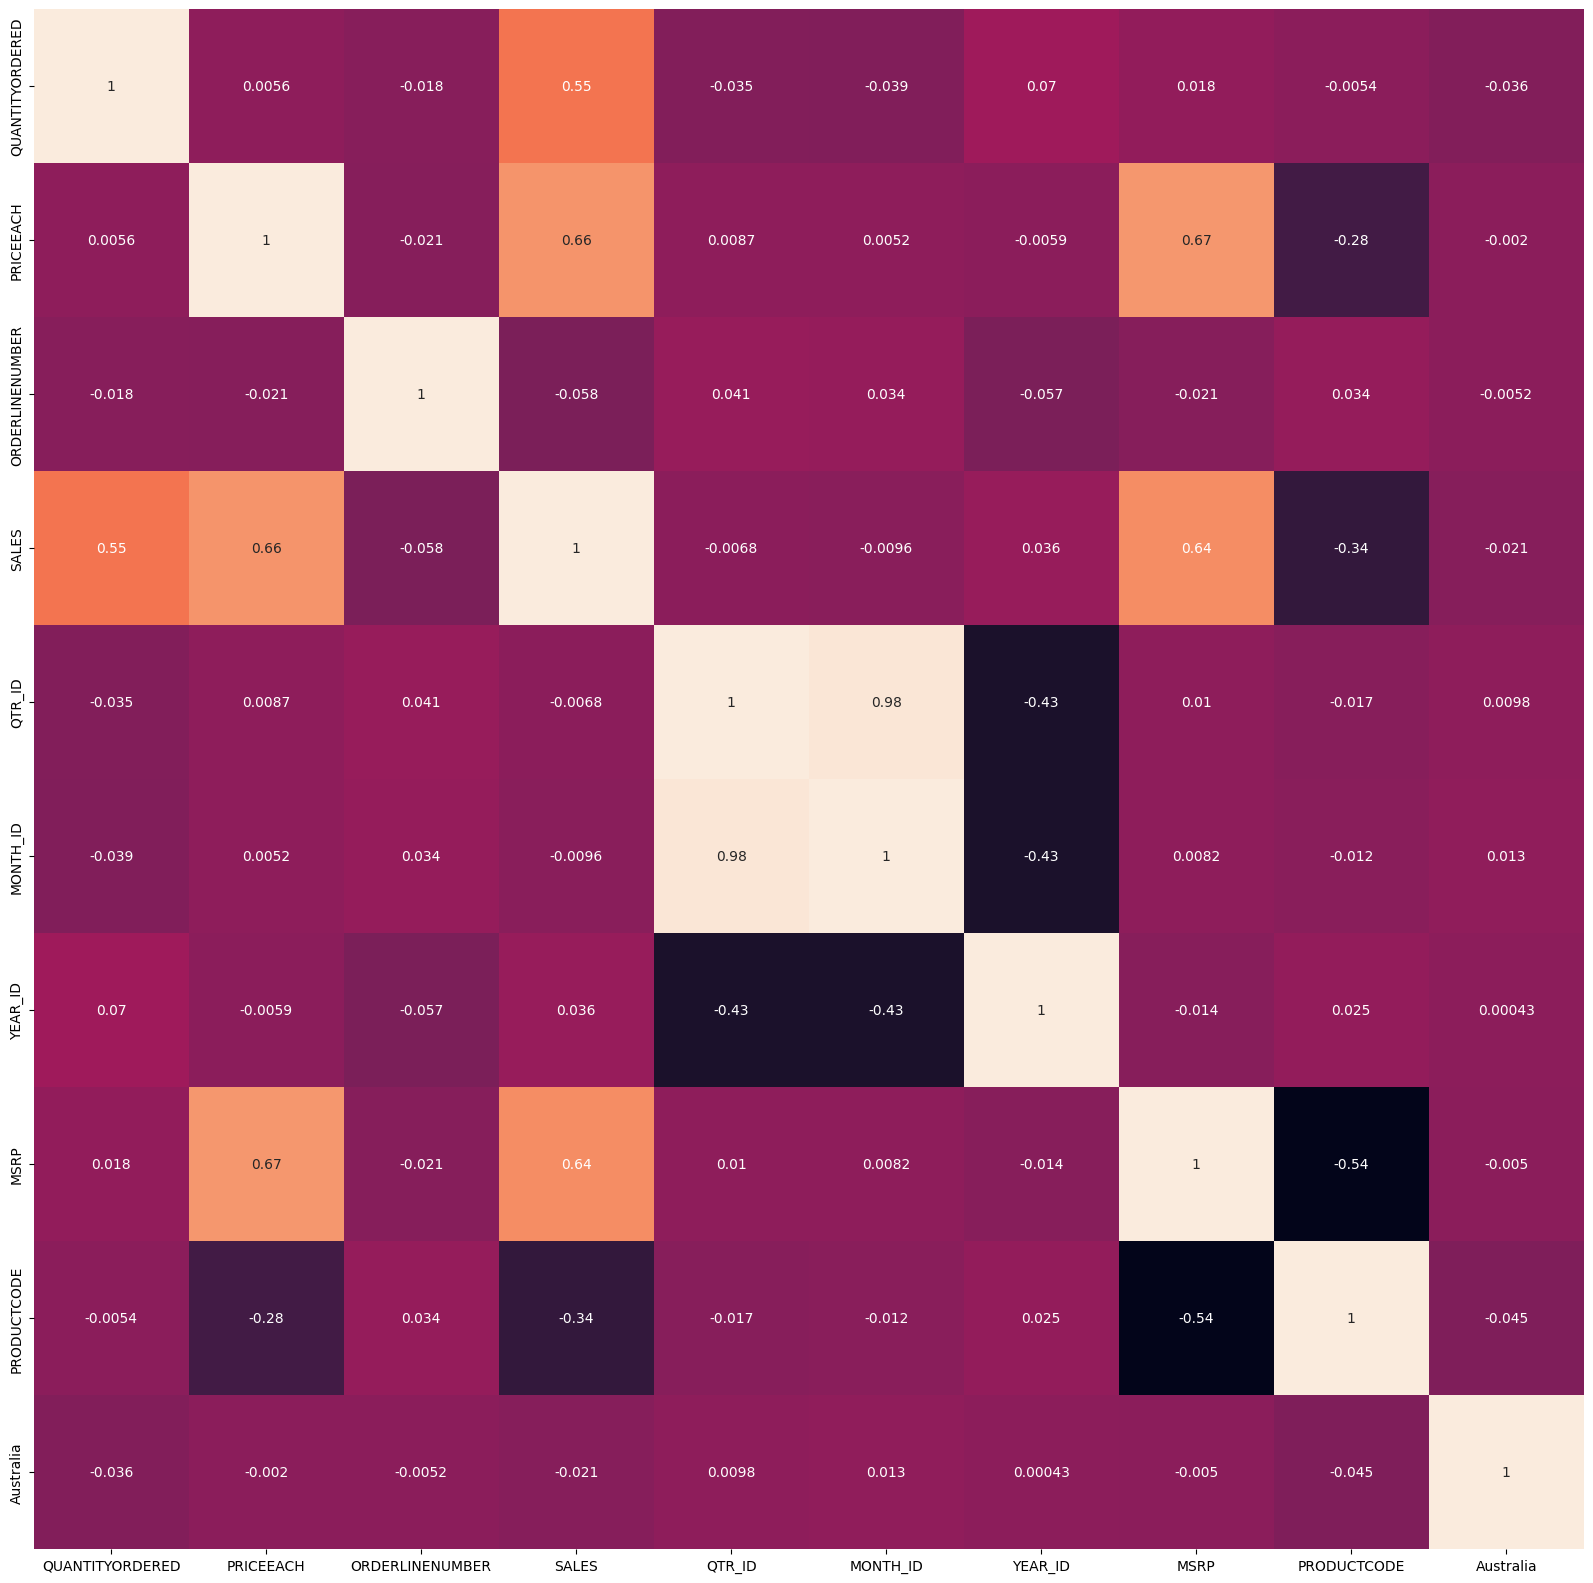

In [ ]:
# I need all up until and not including 10
plt.figure(figsize=(20,20))
corr_marix= sales_ds.iloc[:, :10].apply(pd.to_numeric, errors='coerce').corr()
sns.heatmap(corr_marix, annot= True, cbar=False)

In [ ]:
# When we check 'QTR_ID' and 'MONTH_ID' are highly correlated
# So let' s drop one of them
sales_ds.drop('QTR_ID', axis=1, inplace=True)
sales_ds.shape

(2823, 37)

In [ ]:
# Let's plot distplots
# Distplot shows the (1) histogram, (2) kde plot and (3) rug plot.
# (1) Histogram: it's a graphical display of data using bars with various heights. Each bar groups numbers into ranges and taller bars show that more data falls in that range.
# (2) Kde Plot: Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable.
# (3) Rug plot: plot of data for a single quantitative variable, displayed as marks along an axis (one-dimensional scatter plot).

In [ ]:
plt.figure(figsize = (10, 10))

for i in range(8):
  if sales_ds.columns[i] != 'ORDERLINENUMBER':
    fig = ff.create_distplot([sales_ds[sales_ds.columns[i]].apply(lambda x: float(x))], ['distplot'])
    fig.update_layout(title_text = sales_ds.columns[i])
    fig.show()

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# Visualize the relationship between variables using pairplots
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(sales_ds,
    dimensions = sales_ds.columns[:8], color = 'MONTH_ID')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()

# A trend exists between 'SALES' and 'QUANTITYORDERED'
# A trend exists between 'MSRP' and 'PRICEEACH'
# A trend exists between 'PRICEEACH' and 'SALES'
# It seems that sales growth exists as we move from 2013 to 2014 to 2015 ('SALES' vs. 'YEAR_ID')
# zoom in into 'SALES' and 'QUANTITYORDERED', you will be able to see the monthly information color coded on the graph


<Figure size 1500x1500 with 0 Axes>

## UNDERSTAND THE THEORY AND INTUITION BEHIND K-MEANS CLUSTERING AND FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD


In [ ]:
# Scale the data for clustering
data_scaler= StandardScaler()
sales_ds_scaled= data_scaler.fit_transform(sales_ds)

In [ ]:
sales_ds_scaled.shape

(2823, 37)

<function matplotlib.pyplot.show(close=None, block=None)>

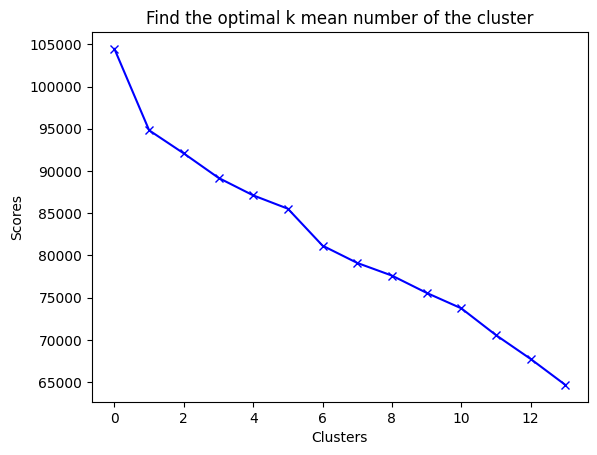

In [ ]:
# Find the optimal number of the cluster(k)
scores=[]
range_values = range(1, 15)

for i in range_values:
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(sales_ds_scaled)
  # intertia is the Sum of squared distances of samples to their closest cluster center
  scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Find the optimal k mean number of the cluster')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show


## APPLY K-MEANS METHOD

In [ ]:
# Cluster the data using k-means
kmeans=KMeans(5)
kmeans.fit(sales_ds_scaled)
labels= kmeans.labels_

In [ ]:
# corrosponding each data points
labels

array([0, 0, 4, ..., 2, 0, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape

(5, 37)

In [ ]:
# Check the cluster centers
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_ds.columns])
cluster_centers


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,-0.467700,-0.730522,0.035673,-0.812845,0.011352,0.004530,-0.596613,0.312760,-0.264819,-0.005148,...,-0.164443,-0.003762,0.071252,0.089287,0.089221,-0.038603,0.072684,-0.242672,-0.980703,1.096370
1,-0.136621,-0.007421,-0.019499,-0.078801,0.048637,0.001609,-0.018750,-0.168952,3.776170,-0.140961,...,-0.118124,0.072390,0.086014,-0.261427,-0.134269,0.004808,0.239741,-0.077568,-0.050797,0.086707
2,0.405414,0.627140,-0.017177,0.766153,0.042706,-0.014303,0.597068,-0.251366,-0.264819,0.056609,...,0.353621,0.021891,-0.024582,0.023805,-0.028714,0.106066,-0.491283,0.328440,0.750322,-0.904536
3,0.191867,-0.057456,-0.010199,0.033722,-0.277772,-0.945247,-0.068541,0.074165,-0.264819,-0.140961,...,0.331795,0.472398,0.269920,-0.300637,-0.167454,-0.345470,-0.429753,-0.074847,0.096424,-0.062363
4,0.364764,0.510626,-0.052103,0.403972,-0.159880,0.090368,0.186230,-0.185916,-0.264819,-0.064399,...,-0.448655,-0.117761,-0.212518,-0.195092,-0.118730,-0.156894,1.067141,-0.127237,0.950880,-0.896160


In [ ]:
# After the clustering is done on scaled data, inverse_transform brings the cluster centers back to the original scale.
# This makes your results interpretable in the original units of measurement.
# Each time running the code will give you differet result

cluster_centers = data_scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[sales_ds.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,310930.900506,1.213144e+07,2745.543539,2.367914e+16,1748.932418,5552.016373,2.067389e+08,6.505299e+07,0.086756,0.022606,...,0.632269,0.172256,0.157045,0.114405,0.032590,0.153683,0.361536,0.071951,0.919107,0.910312
1,339948.659298,1.454582e+07,2671.257615,3.922542e+16,1773.285253,5552.015884,2.672615e+08,4.992337e+07,0.090507,0.022599,...,0.633383,0.172519,0.157088,0.113846,0.032564,0.153804,0.363491,0.072055,0.948139,0.879419
2,387455.832572,1.666456e+07,2674.384814,5.712067e+16,1769.411506,5552.013218,3.317593e+08,4.733490e+07,0.086756,0.022609,...,0.644738,0.172345,0.156767,0.114300,0.032576,0.154088,0.354935,0.072312,0.973150,0.849091
3,368739.259162,1.437875e+07,2683.779265,4.160855e+16,1560.086470,5551.857260,2.620467e+08,5.755917e+07,0.086756,0.022599,...,0.644213,0.173898,0.157622,0.113784,0.032560,0.152823,0.355655,0.072057,0.952735,0.874858
4,383892.943652,1.627553e+07,2627.359801,4.945006e+16,1637.089659,5552.030753,2.887301e+08,4.939056e+07,0.086756,0.022603,...,0.625428,0.171864,0.156221,0.113952,0.032566,0.153351,0.373175,0.072023,0.979412,0.849347


In [ ]:
labels.shape

(2823,)

In [ ]:
#labels.max() #max cluster number
#labels.min() #min cluster number

In [ ]:
y_kmeans = kmeans.fit_predict(sales_ds_scaled)
y_kmeans

array([2, 2, 3, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Add
sales_df_cluster = pd.concat([sales_ds, pd.DataFrame({'cluster':labels})], axis = 1)
sales_df_cluster

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,34,81.35,5,2765.90,5,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,41,94.74,2,3884.34,7,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,4
3,45,83.26,6,3746.70,8,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,2
4,49,100.00,14,5205.27,10,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12,2004,54,108,0,0,...,0,0,1,0,0,0,0,0,1,0
2819,29,100.00,1,3978.51,1,2005,54,108,0,0,...,0,0,1,0,0,0,0,1,0,2
2820,43,100.00,4,5417.57,3,2005,54,108,0,0,...,0,0,1,0,0,0,0,1,0,2
2821,34,62.24,1,2116.16,3,2005,54,108,0,0,...,0,0,1,0,0,0,0,0,1,0


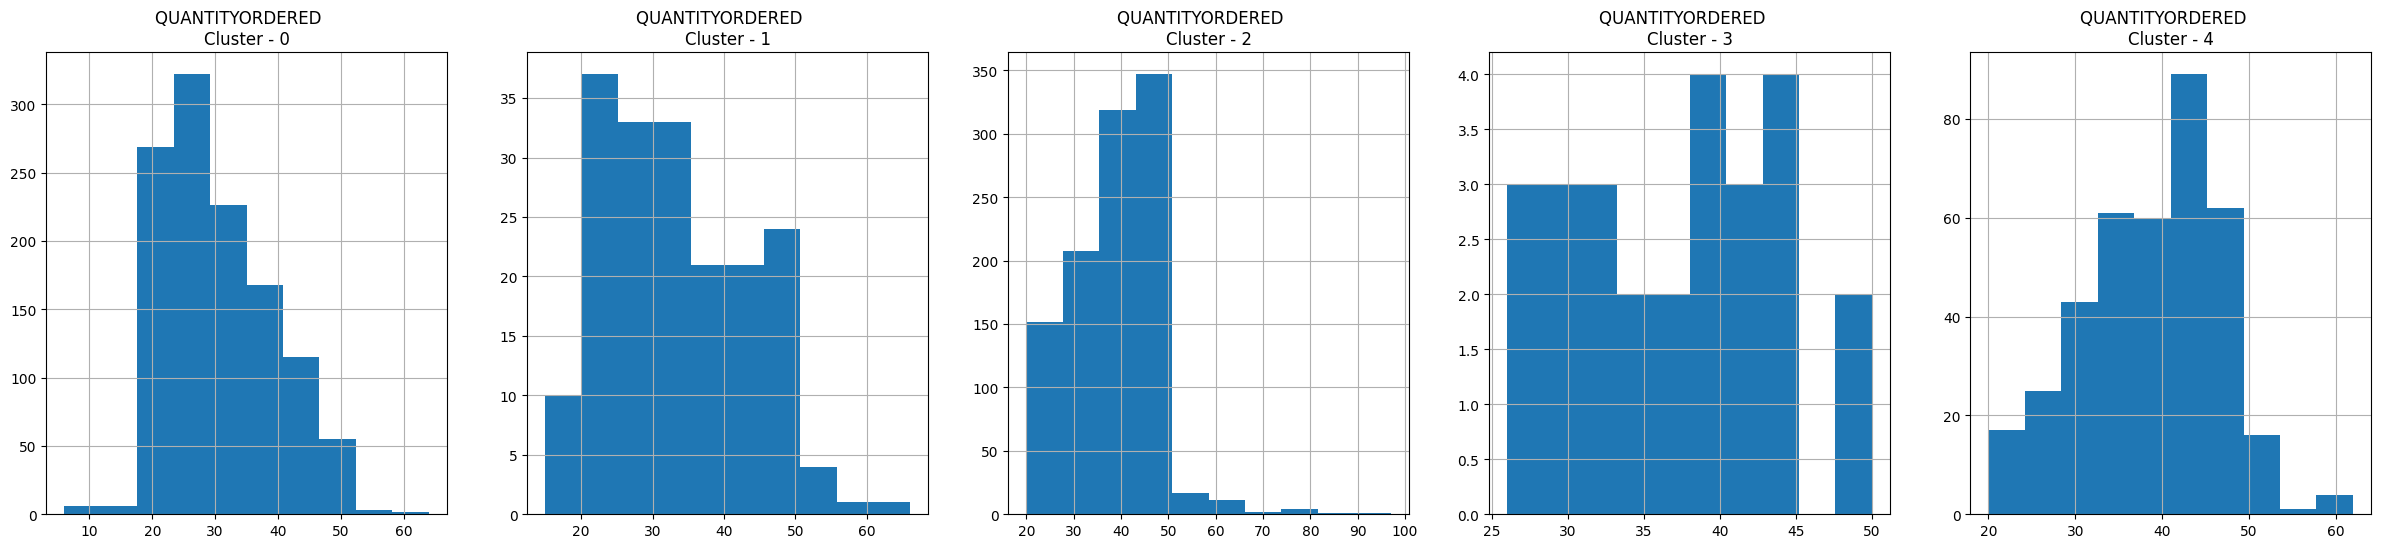

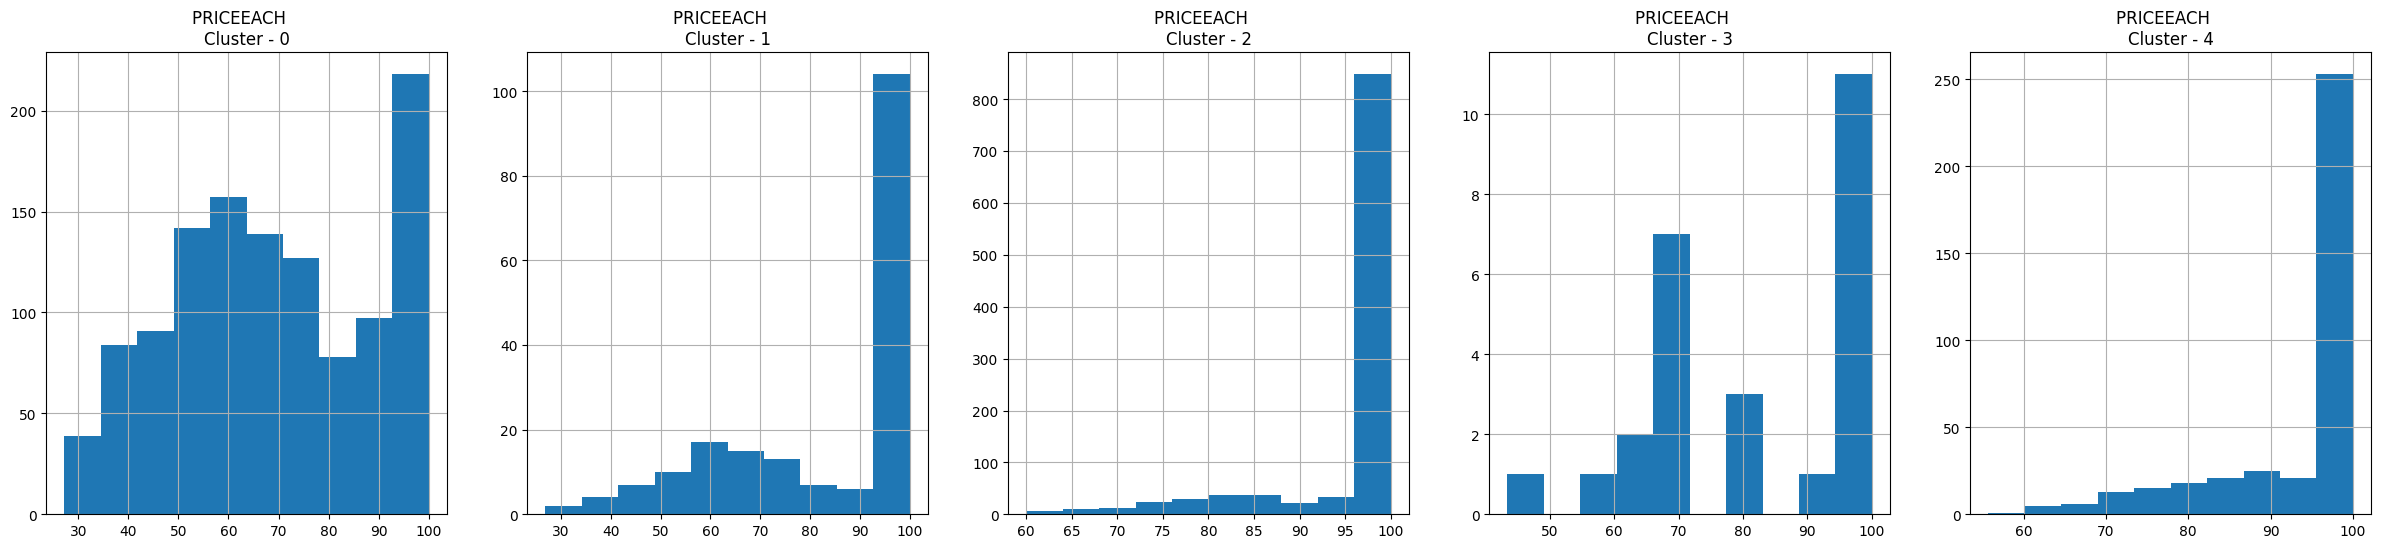

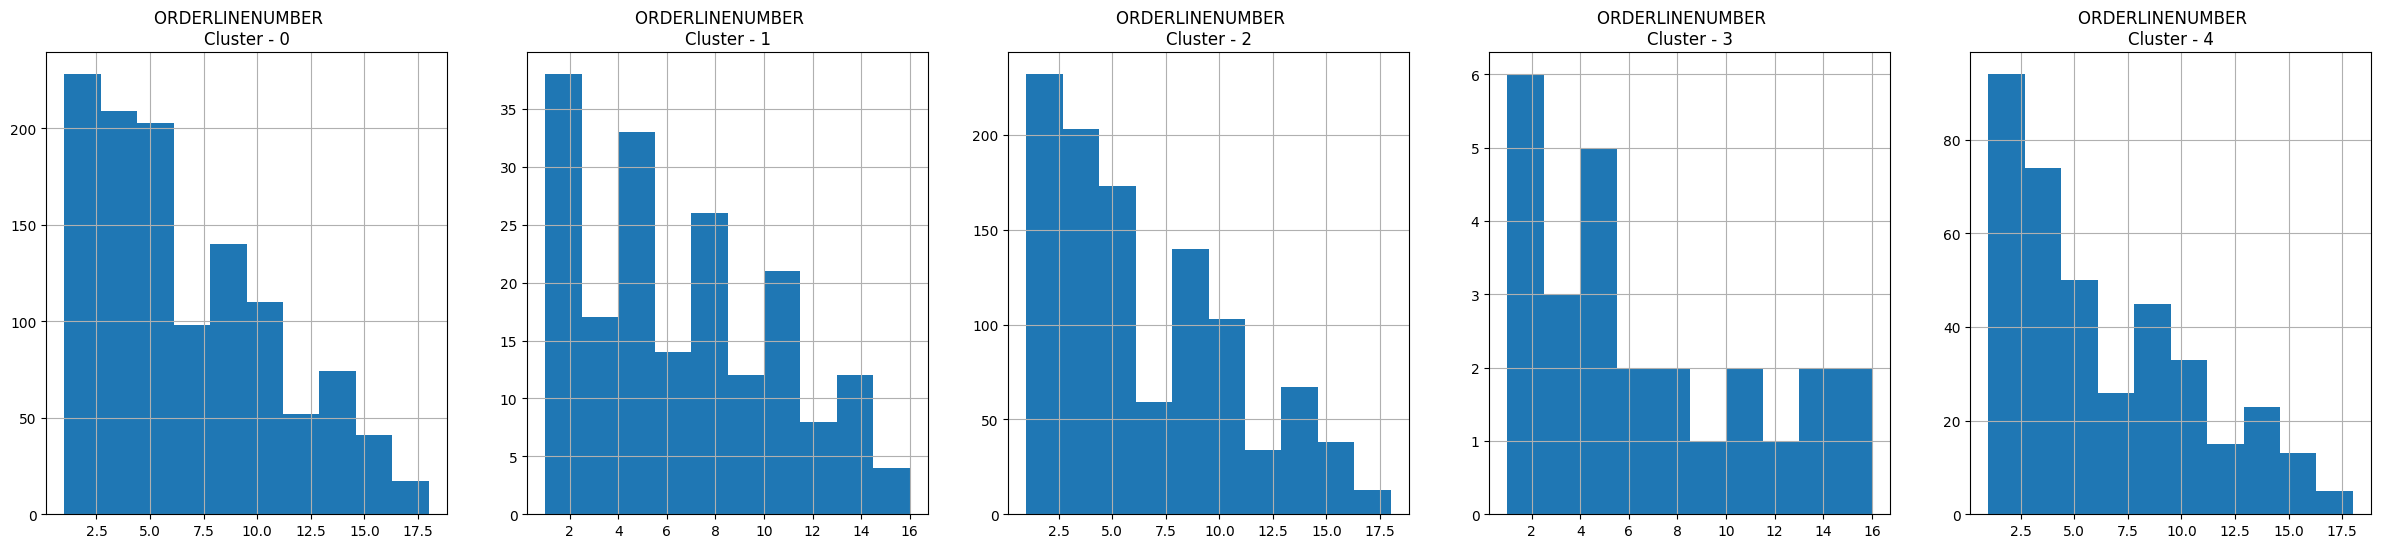

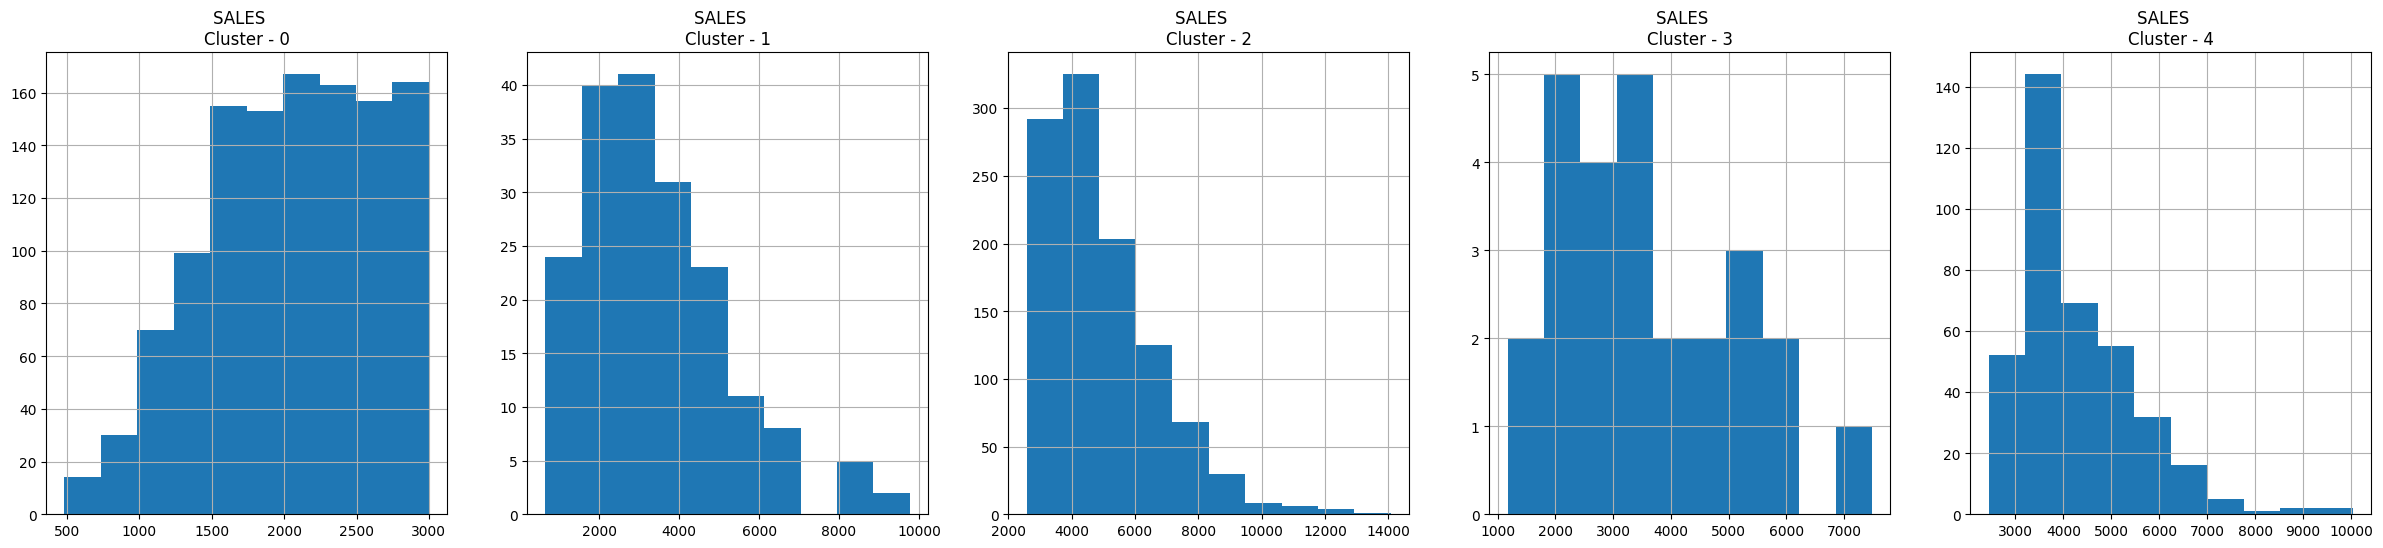

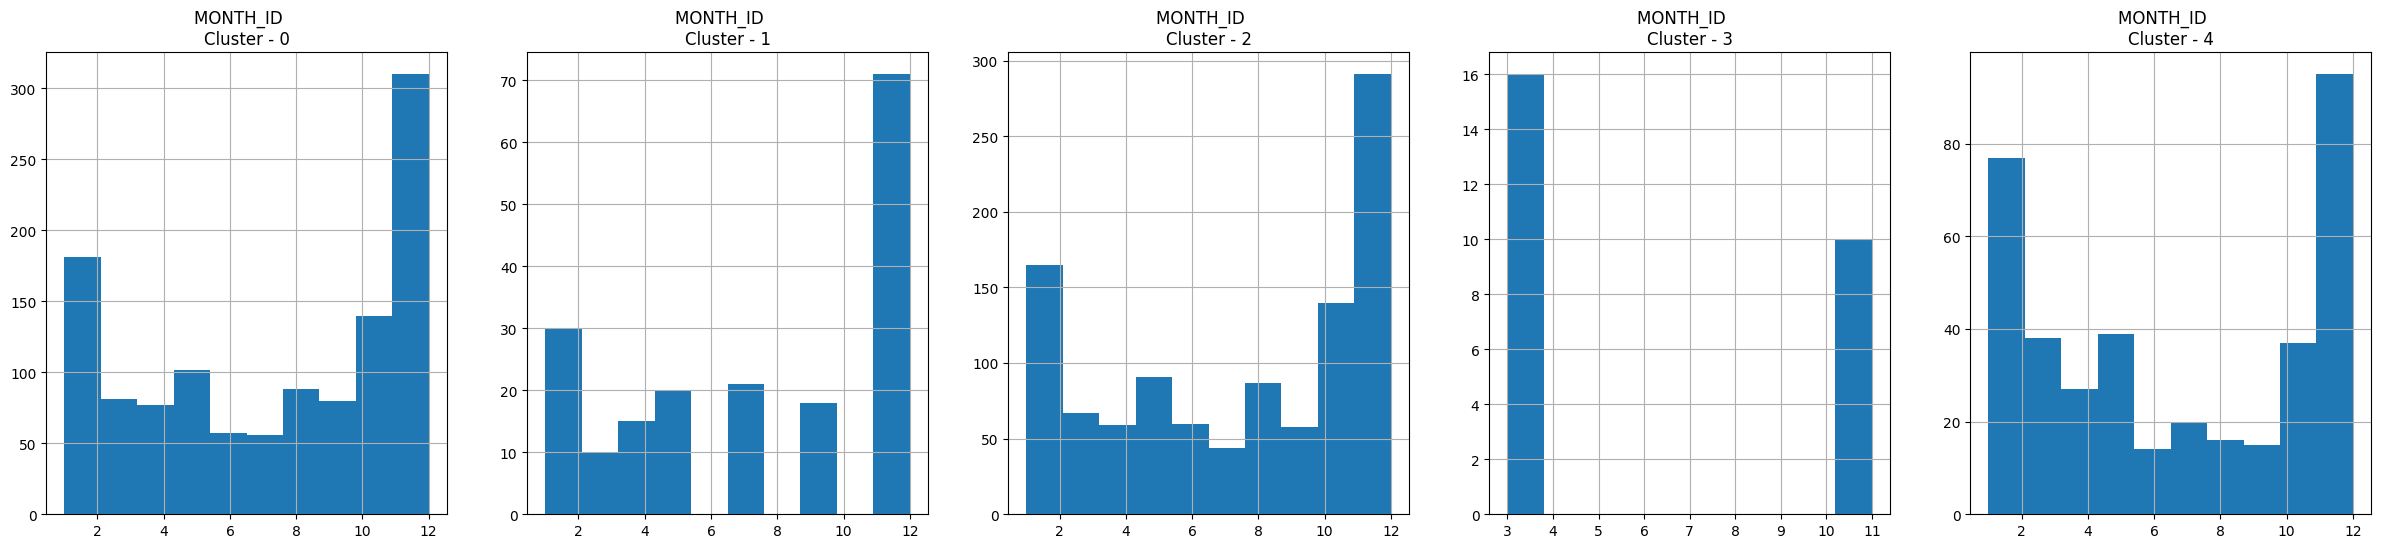

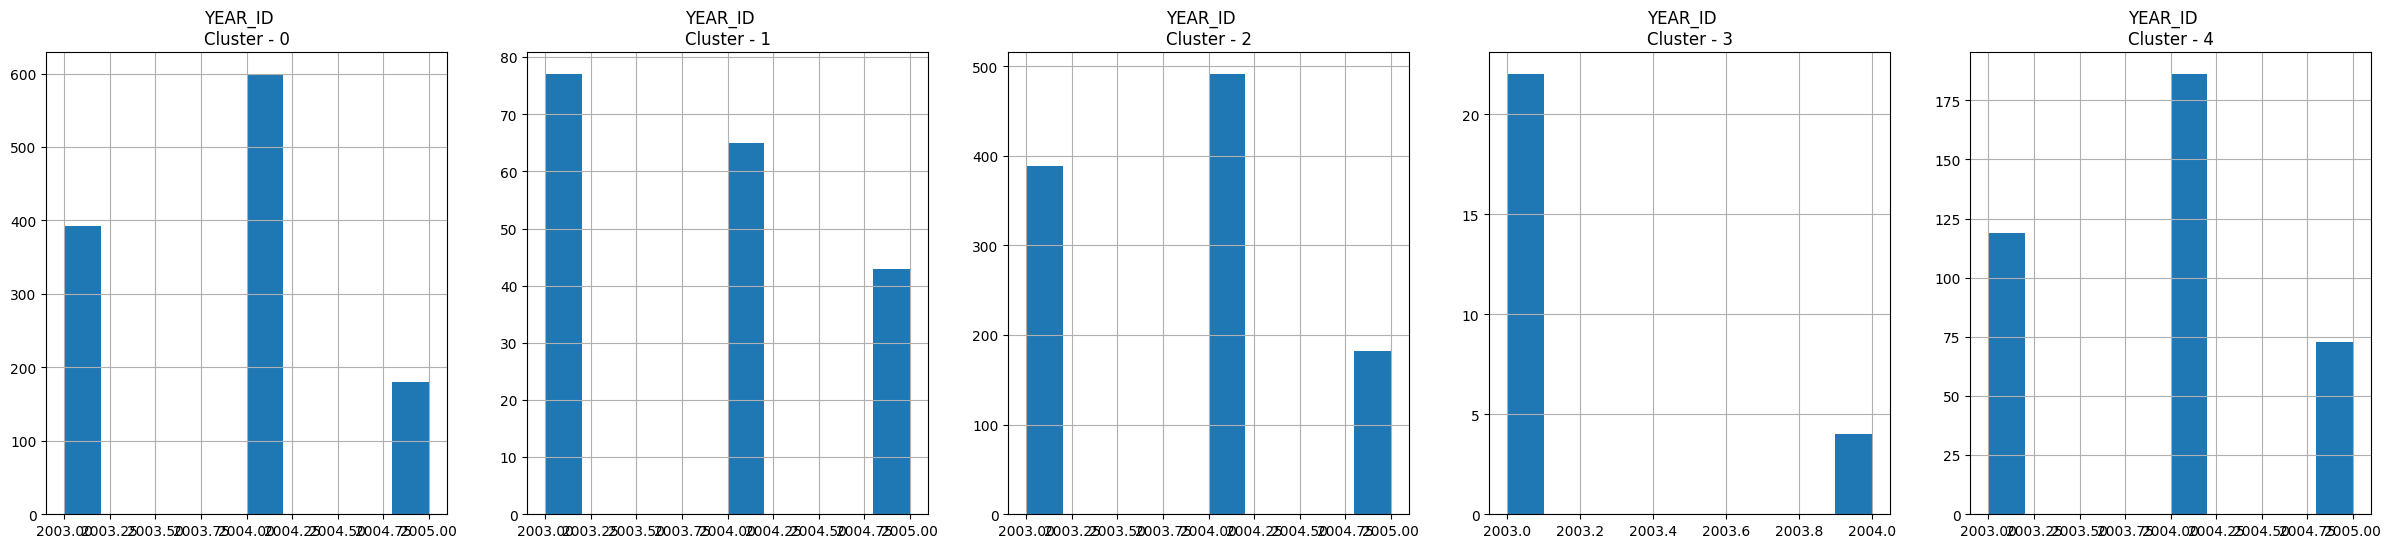

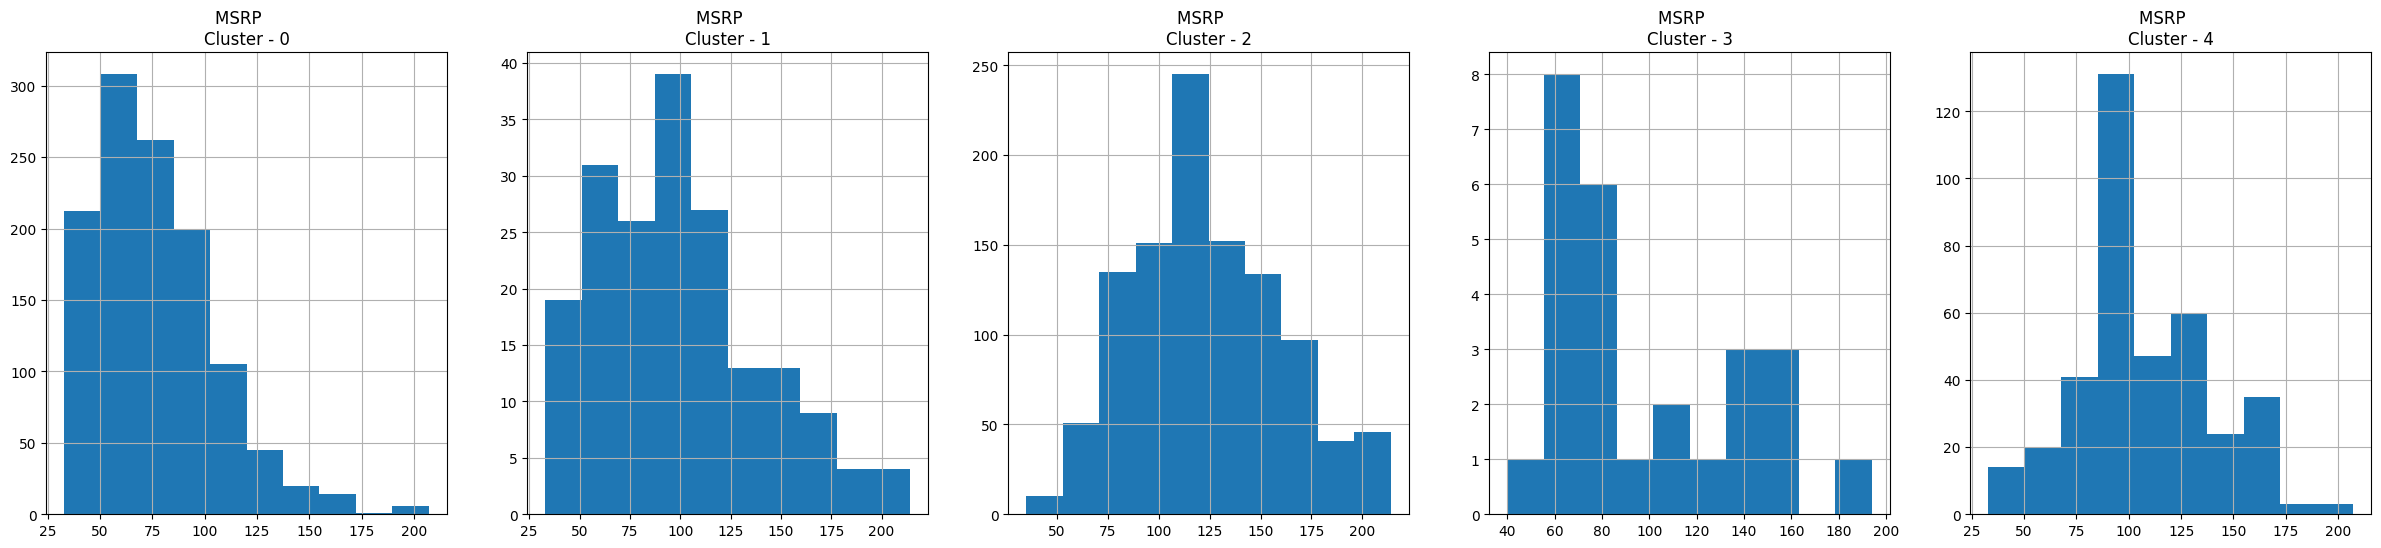

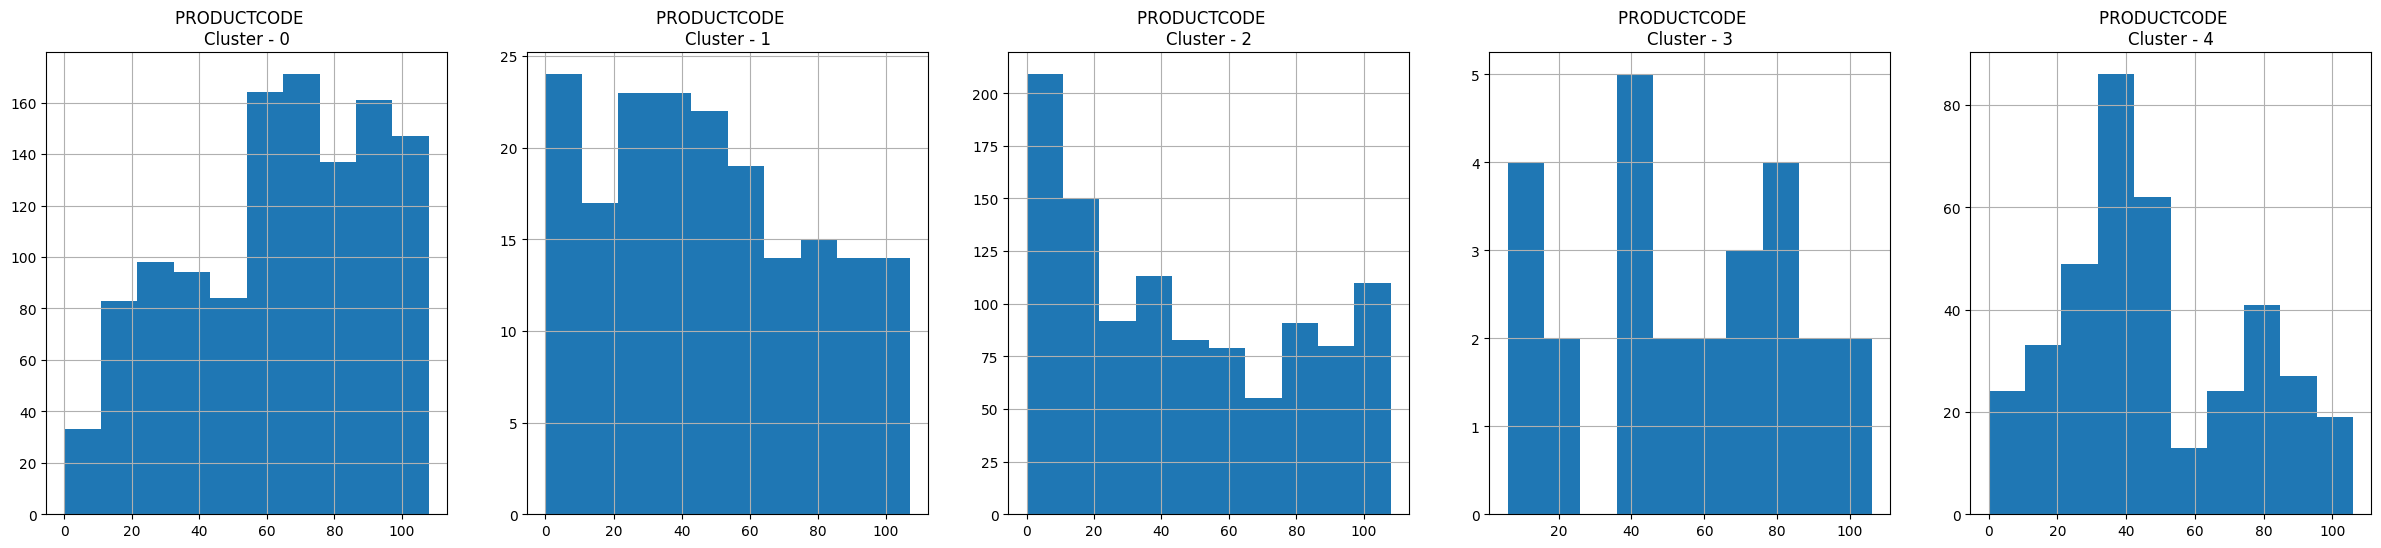

In [ ]:
#Plot hostagram for each feature based on the clusters
for i in sales_ds.columns[:8]:
  plt.figure(figsize=(30,6))
  for j in range(5):
    plt.subplot(1,5, j+1)
    cluster = sales_df_cluster[sales_df_cluster['cluster']==j]
    cluster[i].hist()
    plt.title('{}   \nCluster - {}'.format(i,j))


  plt.show()

##  APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [ ]:
#PCA is unsupervised machine learning algorthm
#PCA is a dimensionality reduction technique used in machine learning and data analysis.
#Reduces the number of features while preserving important information.
#Reduces complexity and computation time.
#Removes noise and redundant data.
#Helps in visualizing high-dimensional data.
#Improves machine learning model performance.

In [ ]:
pca= PCA(n_components=3)
principal_comp = pca.fit_transform(sales_ds_scaled)
principal_comp

array([[-0.48631933,  1.19523199, -1.00267727],
       [-0.78465471,  1.03283188, -1.4162651 ],
       [ 1.43146434, -0.12199648, -0.28129104],
       ...,
       [ 0.38985361, -4.12946409,  0.06056817],
       [-2.78886764, -2.38601395, -1.54986594],
       [-0.7054888 , -3.31242744,  0.51890644]])

In [ ]:
pca_df = pd.DataFrame(data= principal_comp, columns=['pca1','pca2','pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-0.486319,1.195232,-1.002677
1,-0.784655,1.032832,-1.416265
2,1.431464,-0.121996,-0.281291
3,1.288425,0.218280,0.579360
4,1.976022,0.141698,1.061314


In [ ]:
pca_df= pd.concat([pca_df,pd.DataFrame({'clusters': labels})], axis=1)
pca_df

,pca1,pca2,pca3,clusters
0,-0.486319,1.195232,-1.002677,0
1,-0.784655,1.032832,-1.416265,0
2,1.431464,-0.121996,-0.281291,4
3,1.288425,0.218280,0.579360,2
4,1.976022,0.141698,1.061314,2
...,...,...,...,...
2818,-2.450314,-1.113172,1.523553,0
2819,-0.158247,-3.709748,-0.640182,2
2820,0.389854,-4.129464,0.060568,2
2821,-2.788868,-2.386014,-1.549866,0


In [ ]:
# Plot the clusters using 3D- Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color = 'clusters', symbol = 'clusters', size_max = 18, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

In [ ]:
pca2D= PCA(n_components=2)
principal_comp2D = pca2D.fit_transform(sales_ds_scaled)
principal_comp2D

pca_df2D = pd.DataFrame(data= principal_comp2D, columns=['pca1','pca2'])
pca_df2D.head()


,pca1,pca2
0,-0.486319,1.195232
1,-0.784655,1.032832
2,1.431464,-0.121996
3,1.288425,0.218280
4,1.976022,0.141698


In [ ]:
pca_df2D= pd.concat([pca_df2D,pd.DataFrame({'clusters': labels})], axis=1)
pca_df2D

,pca1,pca2,clusters
0,-0.486319,1.195232,0
1,-0.784655,1.032832,0
2,1.431464,-0.121996,4
3,1.288425,0.218280,2
4,1.976022,0.141698,2
...,...,...,...
2818,-2.450314,-1.113172,0
2819,-0.158247,-3.709748,2
2820,0.389854,-4.129464,2
2821,-2.788868,-2.386014,0


<ipython-input-80-d1e6d69ab804>:1: UserWarning:


The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.



<function matplotlib.pyplot.show(close=None, block=None)>

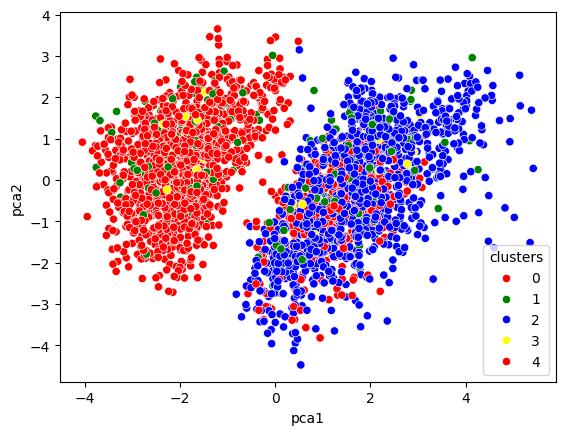

In [ ]:
ax= sns.scatterplot(x= 'pca1', y= 'pca2', hue= 'clusters', data= pca_df2D, palette= ['red', 'green', 'blue', 'yellow'] )
plt.show